In [1]:
import os

list_folders = (sorted(os.listdir('E:/HandwrittenVietnameseRecognition/dataset')))
print(list_folders)

['a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'x', 'y', 'à', 'á', 'â', 'ã', 'è', 'é', 'ê', 'ì', 'í', 'ò', 'ó', 'ô', 'õ', 'ù', 'ú', 'ý', 'ă', 'đ', 'ĩ', 'ũ', 'ơ', 'ư', 'ạ', 'ả', 'ấ', 'ầ', 'ẩ', 'ẫ', 'ậ', 'ắ', 'ằ', 'ẳ', 'ẵ', 'ặ', 'ẹ', 'ẻ', 'ẽ', 'ế', 'ề', 'ể', 'ễ', 'ệ', 'ỉ', 'ị', 'ọ', 'ỏ', 'ố', 'ồ', 'ổ', 'ỗ', 'ộ', 'ớ', 'ờ', 'ở', 'ỡ', 'ợ', 'ụ', 'ủ', 'ứ', 'ừ', 'ử', 'ữ', 'ự', 'ỳ', 'ỵ', 'ỷ', 'ỹ']


In [15]:
from PIL import Image
import numpy as np
from skimage.feature import hog

X_train = []
y_train = []
index = 0
for i in list_folders:
    alphabet = (sorted(os.listdir('E:/HandwrittenVietnameseRecognition/data_train/' + i)))
    for j in alphabet:
        img = Image.open('E:/HandwrittenVietnameseRecognition/data_train/' + i + '/' + j).convert('L')
        im, imghog = hog(img, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True)
        X_train.append(np.array(imghog).ravel())
        y_train.append(index)
    index += 1

In [16]:
X_test = []
y_test = []
index = 0
for i in list_folders:
    alphabet = (sorted(os.listdir('E:/HandwrittenVietnameseRecognition/data_test/' + i)))
    for j in alphabet:
        img = Image.open('E:/HandwrittenVietnameseRecognition/data_test/' + i + '/' + j).convert('L')
        im, imghog = hog(img, pixels_per_cell=(2, 2), cells_per_block=(2, 2), visualize=True)
        X_test.append(np.array(imghog).ravel())
        y_test.append(index)
    index += 1

In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13422, 320)
(5807, 320)
(13422,)
(5807,)


In [19]:
from sklearn.preprocessing import MinMaxScaler

Scaler = MinMaxScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [20]:
from keras.utils import np_utils

X_train = X_train.reshape((X_train.shape[0], 20, 16, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 20, 16, 1)).astype('float32')
# one_hot()
y_train = np_utils.to_categorical(y_train) 
y_test = np_utils.to_categorical(y_test)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(13422, 20, 16, 1)
(5807, 20, 16, 1)
(13422, 89)
(5807, 89)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D, BatchNormalization, Dropout

def get_model():

    model = Sequential()

    model.add(Conv2D(32, (3, 2), input_shape=(20, 16, 1), activation='relu', data_format="channels_last", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(32, (3, 2), input_shape=(20, 16, 1), activation='relu', data_format="channels_last", padding="same"))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Conv2D(64, (3, 2), activation='relu', data_format="channels_last", padding="same"))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 2), activation='relu', data_format="channels_last", padding="same"))
    model.add(BatchNormalization())
    model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))

    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(89, activation='softmax'))

    # Compile  model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [23]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3, shuffle=True)
accuracy_list = []
fold_idx = 1
ep = [10, 20, 30]
i = 0
for train_ids, val_ids in kfold.split(X_train, y_train):
    model = get_model()
    model.fit(X_train[train_ids], y_train[train_ids], epochs=ep[i], verbose=2)
    scores = model.evaluate(X_train[val_ids], y_train[val_ids])

    print("Finished Fold", fold_idx, 'with epochs =', ep[i])
    accuracy_list.append(scores * 100)

    fold_idx = fold_idx + 1
    i += 1

Epoch 1/10
280/280 - 10s - loss: 2.6236 - accuracy: 0.3499 - 10s/epoch - 37ms/step
Epoch 2/10
280/280 - 9s - loss: 1.3188 - accuracy: 0.6207 - 9s/epoch - 34ms/step
Epoch 3/10
280/280 - 9s - loss: 0.9582 - accuracy: 0.7091 - 9s/epoch - 33ms/step
Epoch 4/10
280/280 - 9s - loss: 0.7633 - accuracy: 0.7717 - 9s/epoch - 33ms/step
Epoch 5/10
280/280 - 9s - loss: 0.6281 - accuracy: 0.8049 - 9s/epoch - 34ms/step
Epoch 6/10
280/280 - 9s - loss: 0.5324 - accuracy: 0.8327 - 9s/epoch - 33ms/step
Epoch 7/10
280/280 - 9s - loss: 0.4603 - accuracy: 0.8529 - 9s/epoch - 34ms/step
Epoch 8/10
280/280 - 10s - loss: 0.3959 - accuracy: 0.8708 - 10s/epoch - 34ms/step
Epoch 9/10
280/280 - 9s - loss: 0.3464 - accuracy: 0.8886 - 9s/epoch - 33ms/step
Epoch 10/10
280/280 - 9s - loss: 0.3061 - accuracy: 0.8986 - 9s/epoch - 33ms/step
140/140 [==============================] - 1s 7ms/step - loss: 0.6281 - accuracy: 0.8304
Finished Fold 1 with epochs = 10
Epoch 1/20
280/280 - 10s - loss: 2.6150 - accuracy: 0.3605 - 10

In [26]:
for i in range(0, len(accuracy_list)):
  print('epochs =', ep[i], '- Loss/Accuracy:', set(accuracy_list[i]), '%')

print('* Accuracy avg:', np.mean(accuracy_list), '(+-', np.std(accuracy_list), ')')

epochs = 10 - Loss/Accuracy: {0.6281291842460632, 0.8303531408309937} %
epochs = 20 - Loss/Accuracy: {0.7311292886734009, 0.8379526138305664} %
epochs = 30 - Loss/Accuracy: {0.6221778988838196, 0.8607510328292847} %
* Accuracy avg: 0.7517488598823547 (+- 0.09830803522662475 )


In [27]:
model = get_model()
H = model.fit(X_train, y_train, epochs=30, verbose=2)
scores = model.evaluate(X_test, y_test)
print(scores)

Epoch 1/30
420/420 - 15s - loss: 2.2287 - accuracy: 0.4267 - 15s/epoch - 36ms/step
Epoch 2/30
420/420 - 14s - loss: 1.0747 - accuracy: 0.6803 - 14s/epoch - 34ms/step
Epoch 3/30
420/420 - 14s - loss: 0.7805 - accuracy: 0.7596 - 14s/epoch - 34ms/step
Epoch 4/30
420/420 - 14s - loss: 0.6290 - accuracy: 0.8067 - 14s/epoch - 34ms/step
Epoch 5/30
420/420 - 14s - loss: 0.5306 - accuracy: 0.8329 - 14s/epoch - 33ms/step
Epoch 6/30
420/420 - 14s - loss: 0.4635 - accuracy: 0.8517 - 14s/epoch - 33ms/step
Epoch 7/30
420/420 - 14s - loss: 0.4017 - accuracy: 0.8695 - 14s/epoch - 33ms/step
Epoch 8/30
420/420 - 14s - loss: 0.3547 - accuracy: 0.8815 - 14s/epoch - 33ms/step
Epoch 9/30
420/420 - 14s - loss: 0.3197 - accuracy: 0.8947 - 14s/epoch - 33ms/step
Epoch 10/30
420/420 - 14s - loss: 0.2923 - accuracy: 0.9026 - 14s/epoch - 33ms/step
Epoch 11/30
420/420 - 14s - loss: 0.2571 - accuracy: 0.9109 - 14s/epoch - 33ms/step
Epoch 12/30
420/420 - 14s - loss: 0.2479 - accuracy: 0.9192 - 14s/epoch - 34ms/step
E

In [32]:
y_predict = model.predict(X_test)

In [65]:
y_predict_trans = []
for i in y_predict:
    i = list(i)
    max_value = max(i)
    index = i.index(max_value)
    y_predict_trans.append(index)

y_predict_trans = np.array(y_predict_trans)
print(y_predict_trans)

[ 0  0  0 ... 88 88 88]


In [66]:
y_test_trans = []
for i in y_test:
    i = list(i)
    max_value = max(i)
    index = i.index(max_value)
    y_test_trans.append(index)

y_test_trans = np.array(y_test_trans)
print(y_test_trans)

[ 0  0  0 ... 88 88 88]


<AxesSubplot:>

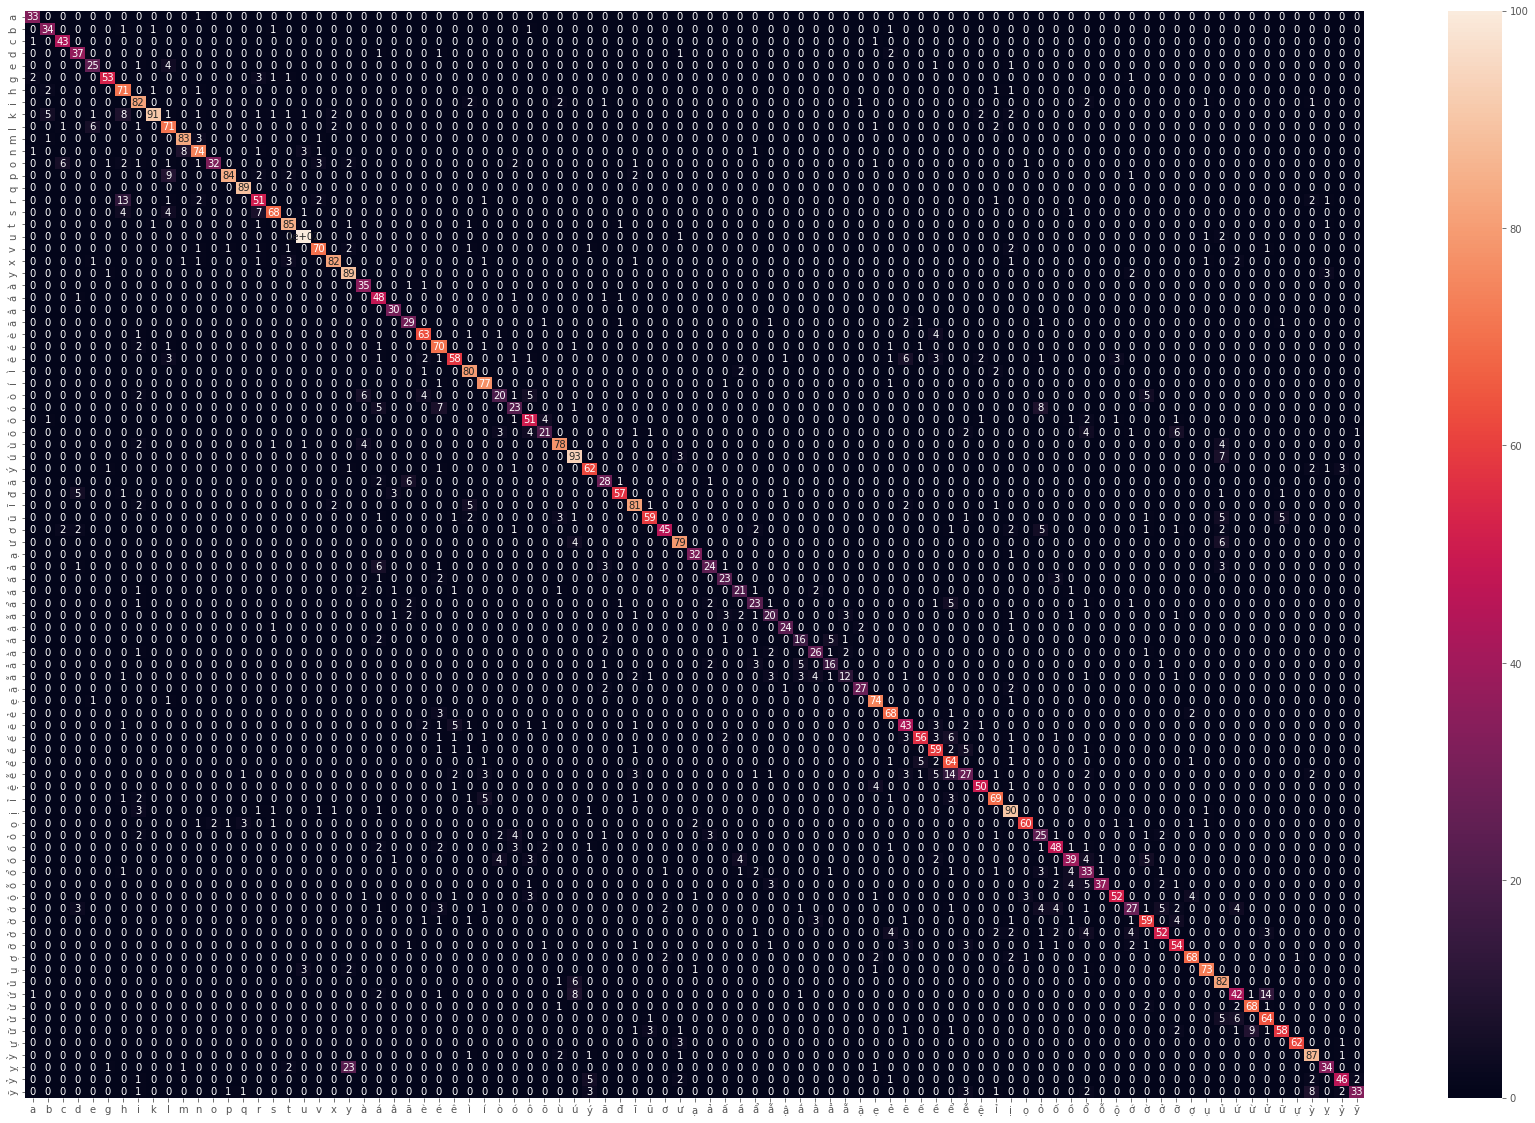

In [68]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

cm=confusion_matrix(y_test_trans, y_predict_trans)
df_cm = pd.DataFrame(cm, list_folders, list_folders)
plt.figure(figsize = (30, 20))
sns.heatmap(df_cm, annot=True)